# Métodos Numéricos (2024)

## Guía 6: Integración Numérica

In [1]:
using Plots
using LaTeXStrings

## Problema 1
1. Haciendo los calculos a mano y trabajando con 7 cifras significativas, encuentre las aproximaciones a las integrales definidas:

    a. $I_1 = \int_0^1 x^4 dx$

    b. $I_2 = \int_0^{\pi} \sin{(x)} dx$

utilizando las reglas simples de *i) punto medio*, *ii) trapecio* y *iii) Simpson*. 

2. Calcule el error absoluto y el error relativo en cada caso y para cada método.

**Teoría**

La regla simple del punto medio es:
$$
\int_a^b dx\, f(x) \approx (b-a)f\bigg(\frac{a+b}{2}\bigg)
$$

La regla simple del trapecio es:
$$
\int_a^b dx\, f(x) \approx \frac{b-a}{2}\bigg(f(a) + f(b)\bigg)
$$

La regla simple de Simpson es:
$$
\int_a^b dx\, f(x) \approx \frac{b-a}{6}\bigg(f(a) + 4f\bigg(\frac{a+b}{2}\bigg) + f(b)\bigg)
$$

In [2]:
#A
f(x) = x^4
I1(x) = (x^5)/5

function integral(A,I)
    a,b = A
    return I(b)-I(a)
end

integral (generic function with 1 method)

In [3]:
function medio_simple(A,f)
    a,b = A
    return (b-a)*f((a+b)/2)
end

medio_simple (generic function with 1 method)

In [4]:
function trapecio_simple(A,f)
    a,b = A
    return ((b-a)/2)*(f(a)+f(b))
end

trapecio_simple (generic function with 1 method)

In [5]:
function simpson_simple(A,f)
    a,b = A
    return ((b-a)/6)*(f(a)+4*f((a+b)/2)+f(b))
end

simpson_simple (generic function with 1 method)

In [6]:
A = (0,1)
println("Valor exacto:",integral(A,I1))
println("Valor con punto medio:",medio_simple(A,f))
println("Valor con trapecio:",trapecio_simple(A,f))
println("Valor con simpson:",simpson_simple(A,f))

Valor exacto:0.2
Valor con punto medio:0.0625
Valor con trapecio:0.5
Valor con simpson:0.20833333333333331


In [7]:
#B
B = (0,pi)
I2(x) = -cos(x)
g(x) = sin(x)
println("Valor exacto:",integral(B,I2))
println("Valor con punto medio:",medio_simple(B,g))
println("Valor con trapecio:",trapecio_simple(B,g))
println("Valor con simpson:",simpson_simple(B,g))


Valor exacto:2.0
Valor con punto medio:3.141592653589793
Valor con trapecio:0.0
Valor con simpson:2.0943951023931953


## Problema 2

1. Repita el problema 1 dividiendo el intervalo de integración en dos subintervalos de igual tamaño. Es decir:

    a. $I_1=\int_0^{1/2} x^4 dx+ \int_{1/2}^1 x^4 dx$

    b. $I_2=\int_0^{\pi/2}\sin{(x)}dx+\int_{\pi/2}^{\pi}\sin{(x)} dx$

2. Compare resultados con lo obtenido en el problema 1.

In [8]:
A1 = (0,1/2)
A2 = (1/2,1)
println("Valor exacto:",integral(A,I1))
println("Valor con punto medio:",medio_simple(A1,f)+medio_simple(A2,f))
println("Valor con trapecio:",trapecio_simple(A1,f)+trapecio_simple(A2,f))
println("Valor con simpson:",simpson_simple(A1,f)+simpson_simple(A2,f))

Valor exacto:0.2
Valor con punto medio:0.16015625
Valor con trapecio:0.28125
Valor con simpson:0.20052083333333331


In [9]:
B1 = (0,pi/2)
B2 = (pi/2,pi)
println("Valor exacto:",integral(B,I2))
println("Valor con punto medio:",medio_simple(B1,g)+medio_simple(B2,g))
println("Valor con trapecio:",trapecio_simple(B1,g)+trapecio_simple(B2,g))
println("Valor con simpson:",simpson_simple(B1,g)+simpson_simple(B2,g))

Valor exacto:2.0
Valor con punto medio:2.221441469079183
Valor con trapecio:1.5707963267948966
Valor con simpson:2.0045597549844207


In [10]:
#Comentarios: Da mejor xd

## Problema 3
1. Construya funciones que dada una función arbitraria, retornen  las aproximaciones numéricas $S_M$, $S_T$ y $S_S$ a una integral de la forma
$$
I = \int_a ^b f(x) dx
$$
utilizando las reglas compuestas del *punto medio*, del *trapecio* y de *Simpson*, respectivamente.
Las funciones deben evaluar el integrando $f(x)$ en $n+1$ puntos equiespaciados $x_i$ para $i=0,1,2,...,n$ y con espaciamiento $h=(b-a)/n$.
En el caso del punto medio, se evalúa en los $x_i+h/2$ para $i=0,1,...,n-1$.

2. Calcule $S_M$, $S_T$ y $S_S$ para la integral:
$$
I = \int _0 ^1 e^{-x} dx
$$
Utilice un espaciamiento $h_1=0.05$ em ambos casos. Luego repita el procedimiento disminuyendo su 
espaciamiento a la mitad, $h_2=h_1/2=0.025$.

3. Teniendo en cuenta que es posible conocer el resultado exacto de la integral en cuestión, evalúe el error
$\varepsilon(h)=|S-I|$, para $h=0.05$ y $h=0.025$ para los tres métodos de aproximación.
Verifique que el cociente de precisión, definido como 
$$
Q = \frac{\varepsilon(h)}{\varepsilon(h/2)}
$$
toma un valor aproximado a $4$ cuando se usa la regla del *punto medio* y del *trapecio*, y un valor aproximado a $16$ cuando se usa la regla de *Simpson*. 
Teniendo en cuenta la expresión del error de truncamiento en cada caso, justifique este resultado.

**Consejo:** tener cuidado con *Simpson* en elegir siempre un número par de intervalos, i.e, un número impar de puntos. Pruebe con una integral conocida, qué resultados da cuando usa un número impar de intervalos. Incluya en la función para dicho método un chequeo de que el número de puntos sea par.

In [11]:
#SIMPSON
function nodos(A,n)
    a,b = A
    @assert n%2 == 0
    h = (b-a)/n
    vect_sim = zeros(n+1)
    vect_sim[1] = a
    for i in 2:n+1
        vect_sim[i] = vect_sim[i-1]+h
    end
    return vect_sim
end

function simpson(A,n,f)
    a,b = A
    h = (b-a)/n
    I = 0
    suma_par = 0
    suma_impar = 0
    
    for i in 1:(Int(n/2)-1)
        suma_par += f(nodos(A,n)[2*i+1])
    end
    
    for j in 1:Int(n/2)
        suma_impar += f(nodos(A,n)[2*j])
    end
    
    I = (h/3)*(f(a)+2*suma_par+4*suma_impar+f(b))
    return I
end


simpson (generic function with 1 method)

In [12]:
function midpoint(A,n,f)
    a,b = A
    h = (b-a)/(n)

    suma = 0
    for j in 1:n
        suma += f(a+(h*j)-(h/2))
    end
    I = h*suma
    return I
end

midpoint (generic function with 1 method)

In [13]:
function trapecio(A,n,f)
    a,b = A
    h = (b-a)/n
    x = zeros(n)
    x[1] = a
    for i in 1:n
        x[i] = a + i*h
    end
    I = 0
    suma = 0
    for j in 1:n-1
        suma += f(x[j])
    end
    I = (h/2)*(f(a)+2*suma+f(b))
    
    return I
end

trapecio (generic function with 1 method)

In [14]:
A = (0,1)
h(x) = ℯ^(-x)
dh(x) = -ℯ^(-x)
println("con h = 0.05: \n Simpson: ",simpson(A,20,h),"\n Midpoint: ", midpoint(A,20,h),"\n Trapecio: ", trapecio(A,20,h))
println("con h = 0.025: \n Simpson: ",simpson(A,40,h),"\n Midpoint: ", midpoint(A,40,h),"\n Trapecio: ", trapecio(A,40,h))

con h = 0.05: 
 Simpson: 0.6321205807706575
 Midpoint: 0.6320547177379595
 Trapecio: 0.6322522451248159
con h = 0.025: 
 Simpson: 0.6321205602002449
 Midpoint: 0.6321040976557455
 Trapecio: 0.6321534814313876


In [15]:
error_simpson(n) = abs(integral(A,dh)-simpson(A,n,h))
error_midpoint(n) = abs(integral(A,dh)-midpoint(A,n,h))
error_trapecio(n) = abs(integral(A,dh)-trapecio(A,n,h))

error_trapecio (generic function with 1 method)

In [16]:
Q_simp = error_simpson(20)/error_simpson(40)
Q_mid = error_midpoint(20)/error_midpoint(40)
Q_trap = error_trapecio(20)/error_trapecio(40)

println("Q Trapecio: ", Q_trap, "\nQ Simpson: ", Q_simp, "\nQ Midpoint: ", Q_mid)

Q Trapecio: 3.9998750080139467
Q Simpson: 15.996431016927477
Q Midpoint: 3.9997812640328503


## Problema 4
1. Para los métodos de integración numérica del problema 3, implemente fórmulas de estimación del error en función de el número de puntos $n$, una cota máxima $M$ asociada a $f(x)$ o alguna de sus derivadas, y los extremos $a$ y $b$ del intérvalo de integración.

2. Indique, para cada método, el mínimo $n$ necesario para alcanzar un error relativo menor a $10^{-7}$ de las siguientes integrales

    a. $\int_0^{1/2} \frac{2}{x-4} \; dx$

    b. $\int_1^{3/2} x^2 \log x \; dx$

3. Compruebe usando los métodos del problema 3 si las estimaciones de $n$ son adecuadas.

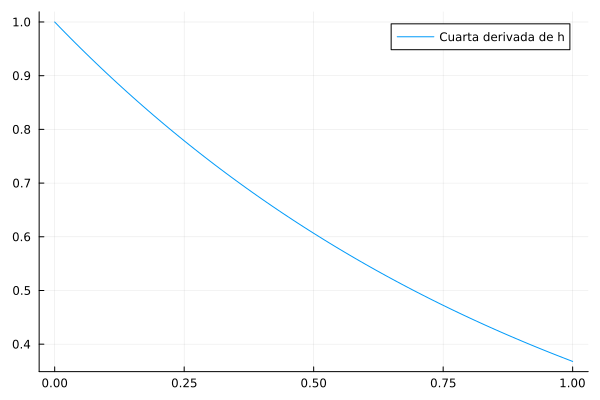

In [17]:
#Plot la 4 derivada de h
dh4(x) = abs(h(x))
plot(0:0.01:1,dh4, label = "Cuarta derivada de h")

In [18]:
#Luego tomo una cota en 0

#Estimo el error de simpson
M = dh4(0)
a,b = A
estim_error_sim_h(n) = (((b-a)*((b-a)/n)^4)/180)*dh4(0)
estim_error_sim_h(20)/estim_error_sim_h(40)

#No hago con los otros metodos porque es re aburrido

16.0

In [19]:
#2.a
f(x) = 2/(x-4)
I = (0,1/2)

(0, 0.5)

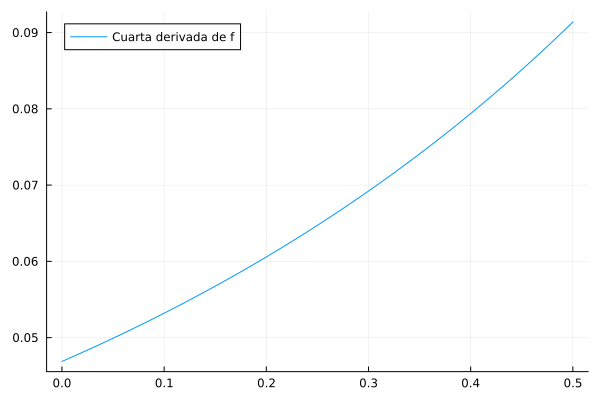

In [20]:
#Simpson
df4(x) = abs(48/(x-4)^5)
plot(0:0.01:1/2,df4, label = "Cuarta derivada de f")

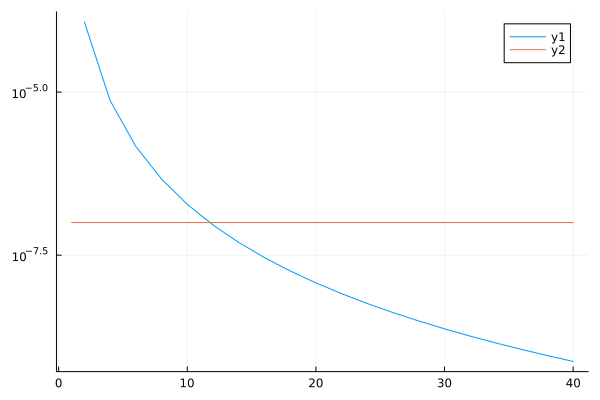

In [38]:
estim_error_sim_f(n) = (((b-a)*((b-a)/n)^4)/180)*df4(0.5) #Estimacion error absoluto
rel_sim(n) = abs(estim_error_sim_f(n)/simpson(I,n,f)) #Estimacion error relativo
k(n) = 10^-7
plot(2:2:40,yscale =:log10,rel_sim)
plot!(1:40,k)

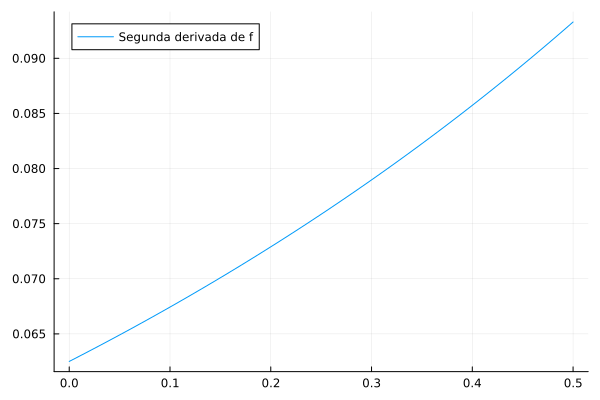

In [22]:
df2(x) = abs(4/(x-4)^3)
plot(0:0.01:1/2,df2, label = "Segunda derivada de f")

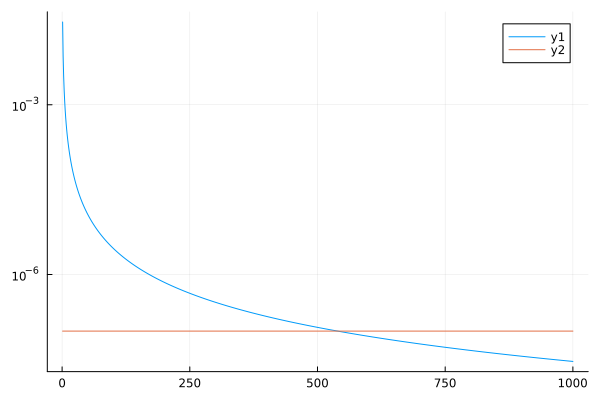

In [32]:
estim_error_trap_f(n) = (((b-a)*((b-a)/n)^2)/12)*df2(0.5) #Estimacion error absoluto
rel_trap(n) = abs(estim_error_trap_f(n)/trapecio(I,n,f)) #Estimacion error relativo
k(n) = 10^-7
plot(1:1:1000,yscale =:log10,rel_trap)
plot!(1:1000,k)

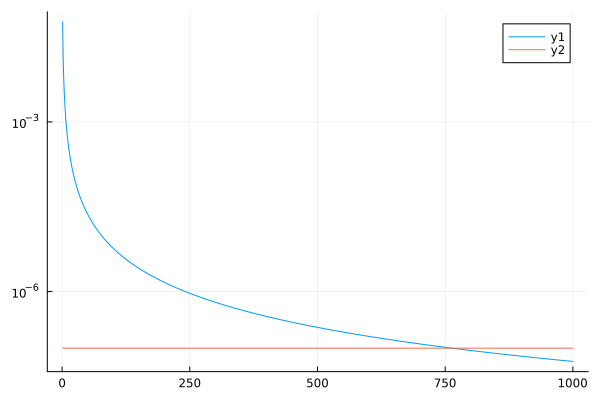

In [31]:
estim_error_mid_f(n) = (((b-a)*((b-a)/n)^2)/6)*df2(0.5) #Estimacion error absoluto
rel_mid(n) = abs(estim_error_mid_f(n)/midpoint(I,n,f)) #Estimacion error relativo
plot(1:1:1000,yscale =:log10,rel_mid)
plot!(1:1000,k)

## Problema 5
**Comparación de métodos.**

1. Aproxime la integral
\begin{equation*}
I = \int_0^1 e^{-t} dt = 1 - e^{-1}  \nonumber              
\end{equation*}
empleando los algoritmos del problema 3.

2. Calcule el error relativo $E$ para $n\in [2,4,8,...,4096]$ ($n=2^i$ con $i=1,2,...$) y grafique $E$ vs $n$ en *log-log*.


3. Verifique visualmente que se satisfacen leyes de potencia
$$
E = Cn^{-\alpha}
$$
y estime visualmente los valores de $C>0$ y $\alpha>0$.

4. Use el gráfico para estimar, para cada método, el mínimo $n$ al cuál se alcanza una precisión $E<10^{-7}$.

5. Repita los incisos anteriores en `Float16` y `Float32`.

6. Determine si el error de redondeo es relevante en estos casos.

## Problema 6
En el repositorio se encuentran dos archivos de datos, 

    mediciones1-c1-g6.dat 
    mediciones2-c1-g6.dat

Los mismos almacenan mediciones de una función $f(t)$ sobre un mismo rango de $t$. El primero muestrea $n=629$ puntos y el segundo $n=10001$.

1. Baje y grafique los datos.

2. Copie y modifique los algoritmos del problema 3 para integrar muestreos de funciones.

3. Integre los muestreos y compare.

# Ejercicios Complementarios

## Problema C.1
Idem problema 4, para las siguientes integrales: 
1. $\int_{1/2}^1 x^4 dx$
2. $\int_0^{\pi/4} x \sin x dx$

**Teoría:** Para los metodos de punto medio y trapecio el error es $\mathcal{O}(h^2)$ y está acotado por (en término de n):

$$
E_T = \frac{(b-a)^3}{12n^2}M_2 \;\;\;\;\;\;\; E_M = \frac{(b-a)^3}{24n^2}M_2,
$$

donde 
$$
M_2 = \max_{x \in [a,b]}\{|f''(x)|\}
$$

Para el método de Simpson el error es $\mathcal{O}(h^4)$ está acotado por 

$$
E_S = \frac{(b-a)^5}{180n^4}M_4 
$$

donde 
$$
M_4 = \max_{x \in [a,b]}\{|f^{(4)}(x)|\}
$$


## Problema C.2
**Integración numérica en dos dimensiones**
1. Haga un programa que integre funciones en la region $a\le x \le b\,;\;c \le y \le d$ siguiendo el código delineado en la clase teórica, usando el método de cuadratura de Simpson en cada coordenada.
2. Evalue nume
ricamente con no menos de 8 cifras significativas las integrales
$$
\int_0^2\,dx\, \int_0^1\,dy\, e^{-x\,y} \;\;\;\;\;\;\;\;\;\;\;\;\;\;
\int_{7/5}^2\,dx\, \int_1^{3/2}\,dy\, \ln{(x+2 y)}
$$
3. Modifique el programa para permitir que los límites de integración en $y$ sean función de $x$ y evalue la integral
$$
\int_0^1\,dx\, \int_0^{\sqrt{1-x^2}}\,dy\, e^{-x\,y} 
$$